In [45]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from pandas.io.json import json_normalize
import seaborn as sns
import statsmodels.api as sm
import requests

In [66]:
plt.style.use('ggplot') #ggplot스타일 사용
#한글폰트
plt.rc('font', family='AppleGothic') #맥용 한글 폰트
plt.rc('axes', unicode_minus=False)

In [4]:
os.getcwd()

'/Users/sinmin-yong/GitHub/Bloging'

In [5]:
riot_df = pd.read_pickle('/Users/sinmin-yong/GitHub/모든저장소데이터셋/파일 저장용(my-study)/team_data2.pickle')

In [15]:
opponent = pd.read_pickle('team_data.pickle')

In [46]:
lol_df = pd.read_pickle('/Users/sinmin-yong/GitHub/모든저장소데이터셋/파일 저장용(my-study)/롤17500개.pickle')

In [4]:
champ = pd.read_pickle('/Users/sinmin-yong/GitHub/모든저장소데이터셋/파일 저장용(my-study)/챔피언정보.pickle')

# A팀 데이터와 B팀의 데이터가 모두 필요
- 데이터를 잘못 저장하여 다시 롤 17500개 데이터를 A,B팀으로 분리하는 작업이 필요

In [3]:
lol_df.head()

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status,teams
0,1558785426058,1274,3676857460,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
1,1558783247340,1720,3676779762,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
2,1558780818696,2029,3676791079,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F..."
3,1558778815052,917,3676754305,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
4,1558777205059,1228,3676659344,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."


In [47]:
#a팀 b팀 분리
team_a_error = []
team_b_error = []
team_a = pd.DataFrame()
team_b = pd.DataFrame()
for i in range(len(lol_df)):
    if i % 1000 == 0:
        print(str(i)+'행 처리중')
    try:
        team_a = team_a.append(json_normalize(lol_df['teams'].iloc[i][0]))
        team_b = team_b.append(json_normalize(lol_df['teams'].iloc[i][1]))
    except:
        team_a_error.append(i)
        team_b_error.append(i)
        print(str(i)+'행에서 오류')
        pass

0행 처리중


/Users/sinmin-yong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.
/Users/sinmin-yong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


1000행 처리중
2000행 처리중
3000행 처리중
4000행 처리중
5000행 처리중
5442행에서 오류
5443행에서 오류
6000행 처리중
7000행 처리중
7045행에서 오류
7046행에서 오류
8000행 처리중
8810행에서 오류
8811행에서 오류
9000행 처리중
9419행에서 오류
9420행에서 오류
9421행에서 오류
9422행에서 오류
10000행 처리중
11000행 처리중
12000행 처리중
13000행 처리중
13507행에서 오류
13508행에서 오류
14000행 처리중
15000행 처리중
15245행에서 오류
15246행에서 오류
15247행에서 오류
15248행에서 오류
16000행 처리중
17000행 처리중


- 16개 행의 team값이 null 아마도 다시시작 데이터일 확률이 높음

In [48]:
# 팀a와 팀 b의 승패가 반대인지 데이터 정합성 검정 -> 모두 반대임을 확인
for i in range(len(team_a)):
    wf_valid = team_a['win'].iloc[i]
    
    if team_b['win'].iloc[i] != wf_valid:
        pass
    else:
        print(str(i)+'행 데이터 정합성 문제')

In [49]:
#각 경기별 게임 시간 병합
lol_df = lol_df.drop(index = team_a_error)

team_a['gameDuration'] = lol_df['gameDuration'].tolist()
team_b['gameDuration'] = lol_df['gameDuration'].tolist()

lol_df['gameDuration'].index = range(len(lol_df))
team_a['gameDuration'].index = range(len(team_a))
team_b['gameDuration'].index = range(len(team_b))

In [13]:
#당장 필요없는 변수 삭제
'''
eda하는 과정에서는 크게 없는 듯
'''
team_a.head()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameDuration
0,100,Fail,True,False,False,False,False,False,2,0,0,0,0,0,0,"[{'championId': 25, 'pickTurn': 1}, {'champion...",1274
0,100,Win,True,True,True,True,True,True,10,2,1,4,0,1,0,"[{'championId': 111, 'pickTurn': 1}, {'champio...",1720
0,100,Win,False,False,True,True,False,False,11,5,1,1,0,0,0,"[{'championId': 7, 'pickTurn': 1}, {'championI...",2029
0,100,Win,True,True,True,False,True,True,5,1,0,1,0,1,0,"[{'championId': 85, 'pickTurn': 1}, {'champion...",917
0,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 25, 'pickTurn': 1}, {'champion...",1228


In [50]:
team_b = team_b.loc[:,team_a.columns.tolist()]
team_b.head()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameDuration
0,200,Win,False,True,True,False,True,True,7,1,0,1,0,1,0,"[{'championId': 39, 'pickTurn': 6}, {'champion...",1274
0,200,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 39, 'pickTurn': 6}, {'champion...",1720
0,200,Fail,True,True,False,False,True,True,4,0,1,3,0,1,0,"[{'championId': 81, 'pickTurn': 6}, {'champion...",2029
0,200,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 99, 'pickTurn': 6}, {'champion...",917
0,200,Win,True,True,True,False,True,True,8,1,0,2,0,1,0,"[{'championId': 7, 'pickTurn': 6}, {'championI...",1228


In [33]:
#ban된 championid는 챔피언 데이터 key값으로 알 수 있을 듯
#key값과 챔피언 이름이 매칭이 된 데이터가 필요함
lol_df['teams'].iloc[0][0]

{'teamId': 100,
 'win': 'Fail',
 'firstBlood': True,
 'firstTower': False,
 'firstInhibitor': False,
 'firstBaron': False,
 'firstDragon': False,
 'firstRiftHerald': False,
 'towerKills': 2,
 'inhibitorKills': 0,
 'baronKills': 0,
 'dragonKills': 0,
 'vilemawKills': 0,
 'riftHeraldKills': 0,
 'dominionVictoryScore': 0,
 'bans': [{'championId': 25, 'pickTurn': 1},
  {'championId': 7, 'pickTurn': 2},
  {'championId': 126, 'pickTurn': 3},
  {'championId': 99, 'pickTurn': 4},
  {'championId': 60, 'pickTurn': 5}]}

# EDA

- 승리한 팀과 패배한 팀 데이터 패턴에는 어떤 차이가 있는지 탐색
    - 승,패의 labeling으로 된 데이터만 있으면 되므로 병합하면 됨

In [51]:
game_df = pd.concat([team_a,team_b],axis=0)

In [97]:
game_df.head()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameDuration
0,100,Fail,True,False,False,False,False,False,2,0,0,0,0,0,0,"[{'championId': 25, 'pickTurn': 1}, {'champion...",1274
0,100,Win,True,True,True,True,True,True,10,2,1,4,0,1,0,"[{'championId': 111, 'pickTurn': 1}, {'champio...",1720
0,100,Win,False,False,True,True,False,False,11,5,1,1,0,0,0,"[{'championId': 7, 'pickTurn': 1}, {'championI...",2029
0,100,Win,True,True,True,False,True,True,5,1,0,1,0,1,0,"[{'championId': 85, 'pickTurn': 1}, {'champion...",917
0,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 25, 'pickTurn': 1}, {'champion...",1228


In [52]:
#분석의 용이성을 위해서 타겟 데이터를 제외한 범주형 데이터를 인코딩
'''
True : 1
False : 0
'''
tf_mapping = {True:1,False:0}
bool_column = game_df.select_dtypes('bool').columns.tolist()

for i in bool_column:
    game_df[i] = game_df[i].map(tf_mapping)
    
wl_mapping = {'Win':'Win','Fail':'Lose'}
game_df['win'] = game_df['win'].map(wl_mapping)

### first object 시각화

In [22]:
def first_valid_visualize(df,target,variable):
    sns.factorplot(target,variable,data=df)
    plt.title(variable+' 변수의 승리확률')
    #plt.xticks(df[target])
    plt.show()

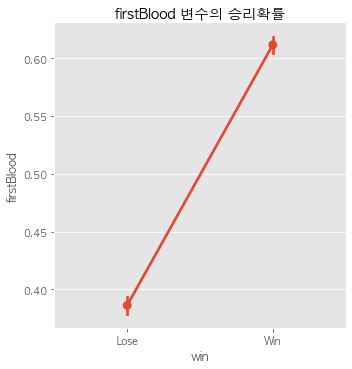

In [23]:
first_valid_visualize(game_df,'win','firstBlood')
plt.show()

- 퍼블을 냈을 때 승리확률이 약 20%P 높아짐

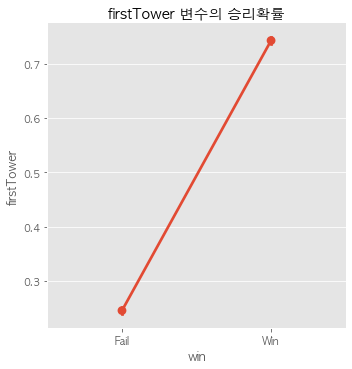

In [68]:
first_valid_visualize(game_df,'win','firstTower')
plt.show()

- 첫타워를 부신 팀의 승리확률이 약 50%p 높아짐

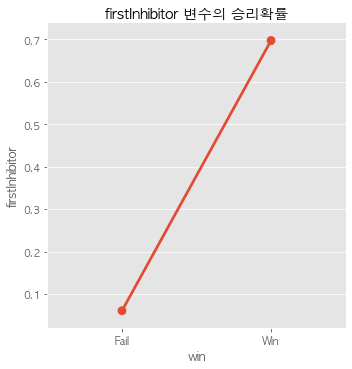

In [69]:
first_valid_visualize(game_df,'win','firstInhibitor')
plt.show()

- 억제기를 부쉇는지 여부이므로 분석 적합x

In [71]:
game_df.groupby('win')['firstBaron'].sum().reset_index(name='Baron_tf')

,win,Baron_tf
0,Fail,1544
1,Win,7631


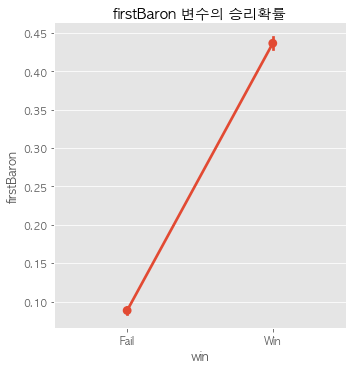

In [70]:
first_valid_visualize(game_df,'win','firstBaron')
plt.show()

- 바론을 먹지 않은 경우가 더 많지만 먹었을경우의 승리 확률이 굉장히 높은 것을 알 수 있음

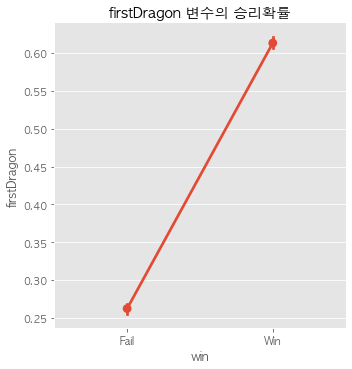

In [74]:
first_valid_visualize(game_df,'win','firstDragon')
plt.show()

- 첫 드래곤의 여부가 승패에 큰 영향인 것을 알 수 있음

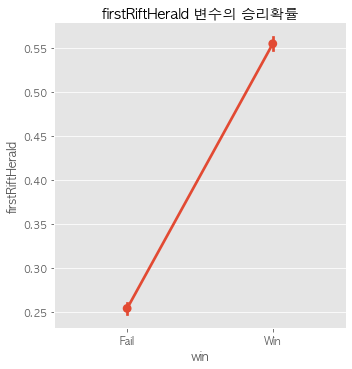

In [75]:
first_valid_visualize(game_df,'win','firstRiftHerald')
plt.show()

- 첫 전령여부도 게임 승리에 높은 영향을 주는 것을 알 수 있음

### 연속형변수 시각화

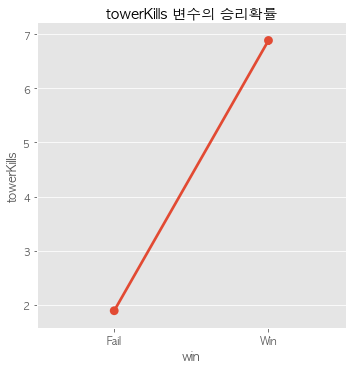

In [76]:
first_valid_visualize(game_df,'win','towerKills')
plt.show()

- 서렌을 제외하고 부신 타워수는 승패에 영향력이 큼

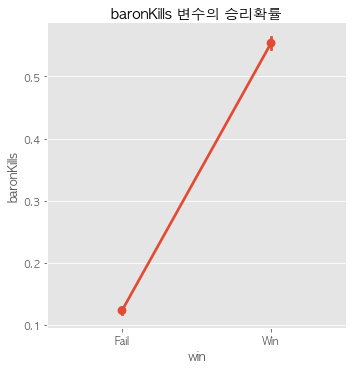

In [77]:
first_valid_visualize(game_df,'win','baronKills')
plt.show()

- 물론 바론을 많이 처치할수록 승리에 가깝게 됨

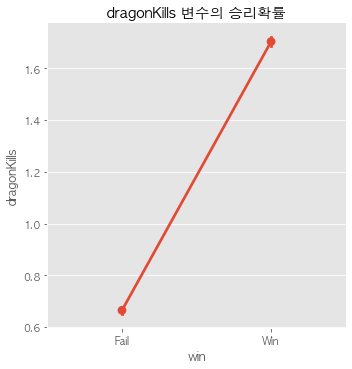

In [78]:
first_valid_visualize(game_df,'win','dragonKills')
plt.show()

- 처치한 드래곤의 숫자의 영향도 큰 것을 확인

자명한 결과들을 좀 알 수 있었음

### 승리팀과 패배팀의 통계값

In [253]:
game_df[game_df['win']=='Win'].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,17484.000000,17484.000000,17484.000000,17484.000000
mean,6.888927,1.188344,0.553821,1.703043
std,2.685313,0.958761,0.636923,1.138878
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,1.000000
50%,7.000000,1.000000,0.000000,2.000000
75%,9.000000,2.000000,1.000000,2.000000
max,11.000000,7.000000,4.000000,6.000000


In [254]:
game_df[game_df['win']=='Lose'].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,17483.000000,17483.000000,17483.000000,17483.000000
mean,1.885489,0.119373,0.122862,0.664531
std,1.970303,0.448457,0.379072,0.948794
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,1.000000
max,11.000000,7.000000,4.000000,6.000000


승리팀들의 연속형변수의 평균값이 높은 것을 알 수 있음

### 그렇다면 게임시간에 대비하여 연속형 변수들은 게임 승패에 어떤 영향을 미칠까?

In [ ]:
#n_tile로 게임시간을 분위수로 파악
#part1
game_part1 = game_df[game_df['game_time']>=30].sort_values('win')
game_part2 = game_df[game_df['game_time']>=40].sort_values('win')
game_part3 = game_df[game_df['game_time']<30].sort_values('win')
game_part4 = game_df[game_df['game_time']<20].sort_values('win')

In [246]:
def sequence_var_inf(variable):
    global game_part1, game_part2, game_part3, game_part4
    
    value1 = game_part4[variable].value_counts().keys().tolist()
    value2 = game_part3[variable].value_counts().keys().tolist()
    value3 = game_part1[variable].value_counts().keys().tolist()
    value4 = game_part2[variable].value_counts().keys().tolist()
    
    value1.sort()
    value2.sort()
    value3.sort()
    value4.sort()
    print('=============================')
    print('GameTime < 20 minute')
    print('=============================\n')
    for i in value1:
        try:
            a = game_part4[game_part4[variable]==i]['win'].value_counts().values[0]
        except:
            a = 0
        try:
            b = game_part4[game_part4[variable]==i]['win'].value_counts().values[1]
        except:
            b = 0
        print(variable+' 변수가 '+str(i)+' 일 때\n Win : {}\n Lose : {}\n'.format(a,b))
    
    print('=============================')
    print('GameTime < 30 minute')
    print('=============================\n')
    for i in value2:
        try:
            a = game_part3[game_part3[variable]==i]['win'].value_counts().values[0]
        except:
            a = 0
        try:
            b = game_part3[game_part3[variable]==i]['win'].value_counts().values[1]
        except:
            b = 0
        print(variable+' 변수가 '+str(i)+' 일 때\n Win : {}\n Lose : {}\n'.format(a,b))
        
    print('=============================')
    print('GameTime > 30 minute')
    print('=============================\n')
    for i in value3:
        try:
            a = game_part1[game_part1[variable]==i]['win'].value_counts().values[0]
        except:
            a = 0
        try:
            b = game_part1[game_part1[variable]==i]['win'].value_counts().values[1]
        except:
            b = 0
        print(variable+' 변수가 '+str(i)+' 일 때\n Win : {}\n Lose : {}\n'.format(a,b))
        
    print('=============================')
    print('GameTime > 40 minute')
    print('=============================\n')
    for i in value4:
        try:
            a = game_part2[game_part2[variable]==i]['win'].value_counts().values[0]
        except:
            a = 0
        try:
            b = game_part2[game_part2[variable]==i]['win'].value_counts().values[1]
        except:
            b = 0
        print(variable+' 변수가 '+str(i)+' 일 때\n Win : {}\n Lose : {}\n'.format(a,b))

In [247]:
sequence_var_inf('dragonKills')

GameTime < 20 minute

dragonKills 변수가 0 일 때
 Win : 4554
 Lose : 1838

dragonKills 변수가 1 일 때
 Win : 2032
 Lose : 619

dragonKills 변수가 2 일 때
 Win : 1310
 Lose : 47

dragonKills 변수가 3 일 때
 Win : 42
 Lose : 1

GameTime < 30 minute

dragonKills 변수가 0 일 때
 Win : 9602
 Lose : 2872

dragonKills 변수가 1 일 때
 Win : 3988
 Lose : 3468

dragonKills 변수가 2 일 때
 Win : 4930
 Lose : 1119

dragonKills 변수가 3 일 때
 Win : 2362
 Lose : 278

dragonKills 변수가 4 일 때
 Win : 351
 Lose : 35

GameTime > 30 minute

dragonKills 변수가 0 일 때
 Win : 528
 Lose : 133

dragonKills 변수가 1 일 때
 Win : 937
 Lose : 490

dragonKills 변수가 2 일 때
 Win : 849
 Lose : 807

dragonKills 변수가 3 일 때
 Win : 913
 Lose : 488

dragonKills 변수가 4 일 때
 Win : 480
 Lose : 186

dragonKills 변수가 5 일 때
 Win : 105
 Lose : 31

dragonKills 변수가 6 일 때
 Win : 11
 Lose : 4

GameTime > 40 minute

dragonKills 변수가 0 일 때
 Win : 9
 Lose : 5

dragonKills 변수가 1 일 때
 Win : 28
 Lose : 12

dragonKills 변수가 2 일 때
 Win : 50
 Lose : 28

dragonKills 변수가 3 일 때
 Win : 62
 Lose : 46



In [248]:
sequence_var_inf('baronKills')

GameTime < 20 minute

baronKills 변수가 0 일 때
 Win : 5221
 Lose : 5215

baronKills 변수가 1 일 때
 Win : 7
 Lose : 0

GameTime < 30 minute

baronKills 변수가 0 일 때
 Win : 13955
 Lose : 8687

baronKills 변수가 1 일 때
 Win : 5568
 Lose : 531

baronKills 변수가 2 일 때
 Win : 248
 Lose : 16

GameTime > 30 minute

baronKills 변수가 0 일 때
 Win : 1665
 Lose : 431

baronKills 변수가 1 일 때
 Win : 1549
 Lose : 1074

baronKills 변수가 2 일 때
 Win : 934
 Lose : 217

baronKills 변수가 3 일 때
 Win : 66
 Lose : 23

baronKills 변수가 4 일 때
 Win : 2
 Lose : 1

GameTime > 40 minute

baronKills 변수가 0 일 때
 Win : 36
 Lose : 21

baronKills 변수가 1 일 때
 Win : 74
 Lose : 60

baronKills 변수가 2 일 때
 Win : 58
 Lose : 40

baronKills 변수가 3 일 때
 Win : 23
 Lose : 11

baronKills 변수가 4 일 때
 Win : 2
 Lose : 1



In [250]:
sequence_var_inf('inhibitorKills')

GameTime < 20 minute

inhibitorKills 변수가 0 일 때
 Win : 5108
 Lose : 2368

inhibitorKills 변수가 1 일 때
 Win : 2152
 Lose : 99

inhibitorKills 변수가 2 일 때
 Win : 643
 Lose : 14

inhibitorKills 변수가 3 일 때
 Win : 57
 Lose : 0

inhibitorKills 변수가 4 일 때
 Win : 2
 Lose : 0

GameTime < 30 minute

inhibitorKills 변수가 0 일 때
 Win : 13860
 Lose : 4200

inhibitorKills 변수가 1 일 때
 Win : 6239
 Lose : 465

inhibitorKills 변수가 2 일 때
 Win : 3147
 Lose : 151

inhibitorKills 변수가 3 일 때
 Win : 821
 Lose : 23

inhibitorKills 변수가 4 일 때
 Win : 83
 Lose : 3

inhibitorKills 변수가 5 일 때
 Win : 12
 Lose : 0

inhibitorKills 변수가 6 일 때
 Win : 1
 Lose : 0

GameTime > 30 minute

inhibitorKills 변수가 0 일 때
 Win : 2146
 Lose : 72

inhibitorKills 변수가 1 일 때
 Win : 1341
 Lose : 568

inhibitorKills 변수가 2 일 때
 Win : 930
 Lose : 175

inhibitorKills 변수가 3 일 때
 Win : 450
 Lose : 58

inhibitorKills 변수가 4 일 때
 Win : 127
 Lose : 26

inhibitorKills 변수가 5 일 때
 Win : 44
 Lose : 6

inhibitorKills 변수가 6 일 때
 Win : 15
 Lose : 1

inhibitorKills 변수가 7 일

In [251]:
sequence_var_inf('towerKills')

GameTime < 20 minute

towerKills 변수가 0 일 때
 Win : 3676
 Lose : 218

towerKills 변수가 1 일 때
 Win : 1163
 Lose : 142

towerKills 변수가 2 일 때
 Win : 457
 Lose : 327

towerKills 변수가 3 일 때
 Win : 673
 Lose : 41

towerKills 변수가 4 일 때
 Win : 1368
 Lose : 12

towerKills 변수가 5 일 때
 Win : 451
 Lose : 0

towerKills 변수가 6 일 때
 Win : 433
 Lose : 1

towerKills 변수가 7 일 때
 Win : 580
 Lose : 1

towerKills 변수가 8 일 때
 Win : 375
 Lose : 0

towerKills 변수가 9 일 때
 Win : 292
 Lose : 0

towerKills 변수가 10 일 때
 Win : 164
 Lose : 0

towerKills 변수가 11 일 때
 Win : 69
 Lose : 0

GameTime < 30 minute

towerKills 변수가 0 일 때
 Win : 5301
 Lose : 221

towerKills 변수가 1 일 때
 Win : 3586
 Lose : 157

towerKills 변수가 2 일 때
 Win : 2715
 Lose : 545

towerKills 변수가 3 일 때
 Win : 1665
 Lose : 1000

towerKills 변수가 4 일 때
 Win : 2454
 Lose : 761

towerKills 변수가 5 일 때
 Win : 1204
 Lose : 292

towerKills 변수가 6 일 때
 Win : 1194
 Lose : 105

towerKills 변수가 7 일 때
 Win : 1842
 Lose : 48

towerKills 변수가 8 일 때
 Win : 1708
 Lose : 21

towerKills 변수가 

### 게임시간이 길경우 오브젝트 싸움이 과연 중요할까?


게임시간이 긴 경우와 짧은 경우의 첫 오브젝트에 대한 게임 승패 영향파악

In [53]:
game_df['game_time'] = game_df['gameDuration']/60

In [27]:
#3사분위수를 확인해보니 27분 일단 약 30분을 장기게임으로 둔 것 part1
#과 40분 이상 게임을 장기게임으로 둔 part2로 나눠서 파악
game_df['game_time'].describe()

count    34968.000000
mean        23.506379
std          6.719702
min          3.183333
25%         18.800000
50%         23.216667
75%         27.983333
max         51.150000
Name: game_time, dtype: float64

In [143]:
#n_tile로 게임시간을 분위수로 파악
#part1
game_part1 = game_df[game_df['game_time']>=30].sort_values('win')
game_part2 = game_df[game_df['game_time']>=40].sort_values('win')
game_part3 = game_df[game_df['game_time']<30].sort_values('win')
game_part4 = game_df[game_df['game_time']<20].sort_values('win')

In [195]:
def first_time_ratio(target,variable):
    global game_part1, game_part2, game_part3, game_part4
    

    fig = plt.figure(figsize=(20,20))
    fig.suptitle('게임 시간대별 승리 팀과 패배 팀의 ' + variable + ' 비율',size = 30)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    ax1.set_title('GameTime < 20 minute',size = 20)
    ax2.set_title('GameTime < 30 minute',size = 20)
    ax3.set_title('GameTime > 30 minute',size = 20)
    ax4.set_title('GameTime > 40 minute',size = 20)
    
    
    sns.factorplot(target,variable,data=game_part4,ax=ax1)
    #plt.title(variable+' 변수의 승리확률(GameTime < 20 minute)')
    #plt.show()
    
    
    sns.factorplot(target,variable,data=game_part3,ax=ax2)
    #plt.title(variable+' 변수의 승리확률(GameTime < 30 minute)')
    #plt.show()

    sns.factorplot(target,variable,data=game_part1,ax=ax3)
    #plt.title(variable+' 변수의 승리확률(GameTime >= 30 minute)')
    #plt.xticks(df[target])
    #plt.show()
    
    sns.factorplot(target,variable,data=game_part2,ax=ax4)
    #plt.title(variable+' 변수의 승리확률(GameTime >= 40 minute)')
    #plt.xticks(df[target])
    #plt.show()
    #plt.close(g.fig)
    #plt.show()
    

### 범주형 변수와의 상관관계

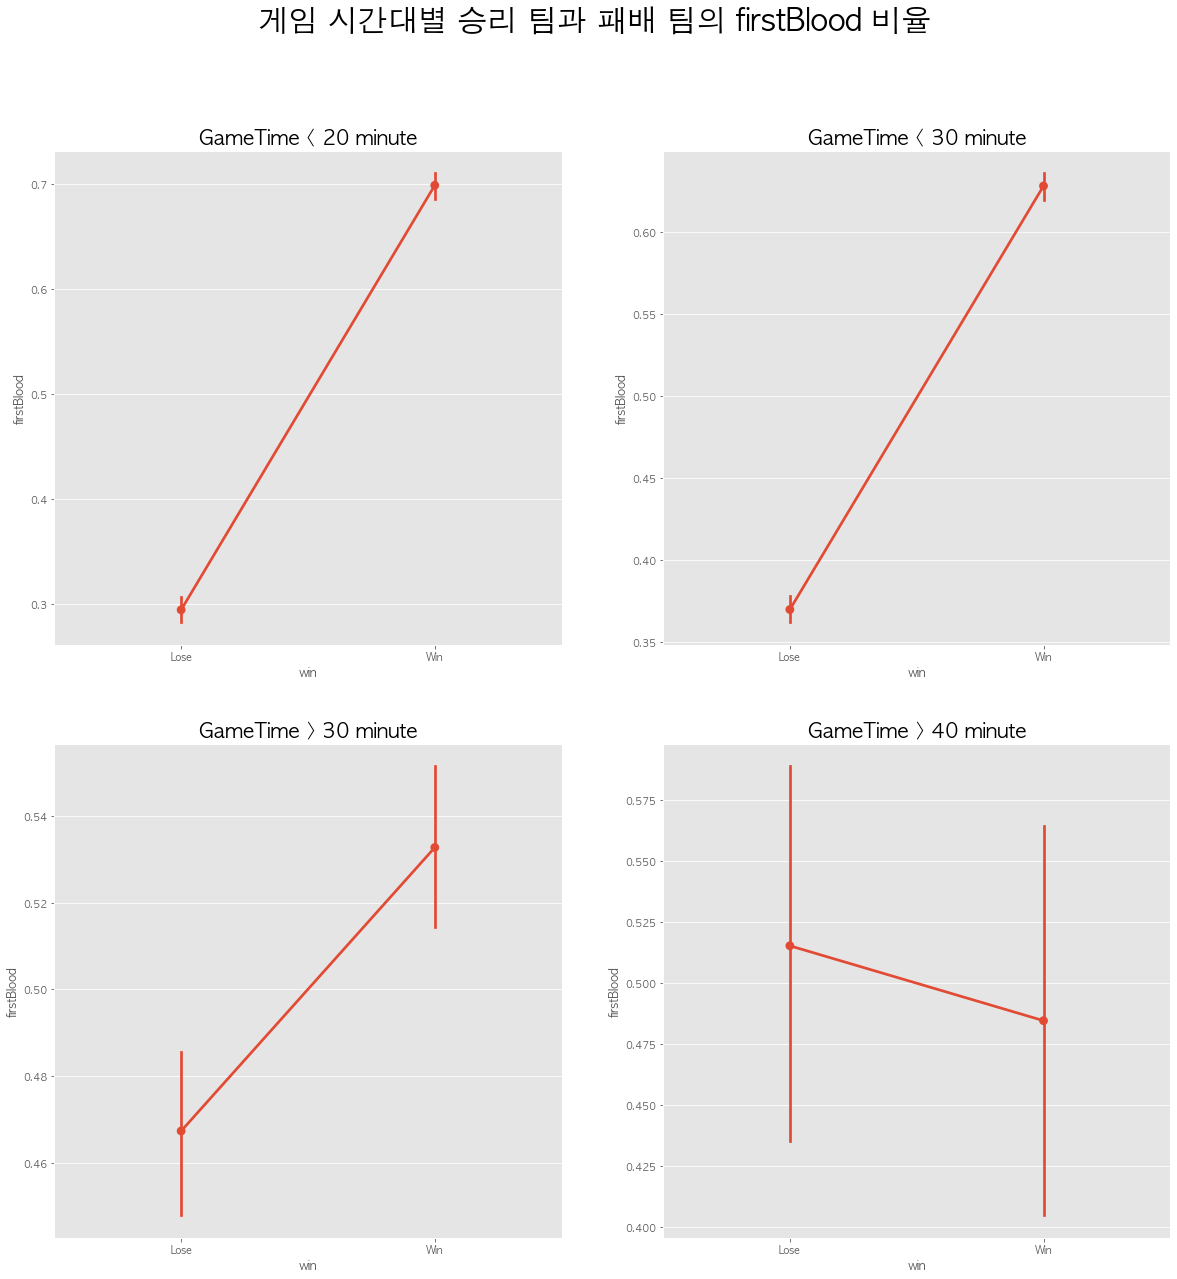

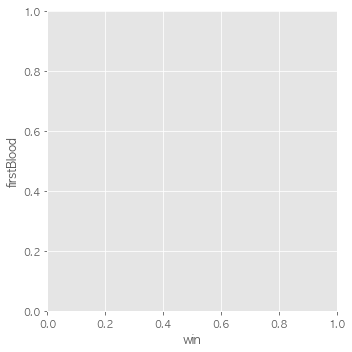

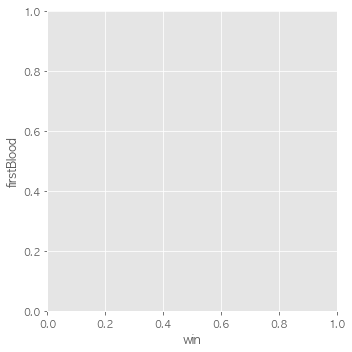

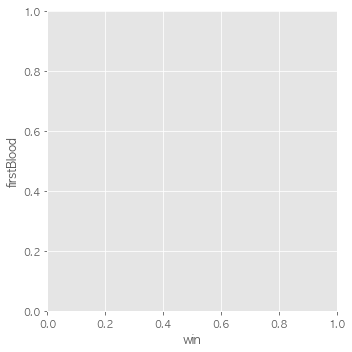

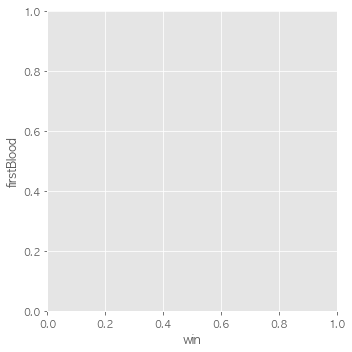

In [196]:
first_time_ratio('win','firstBlood')

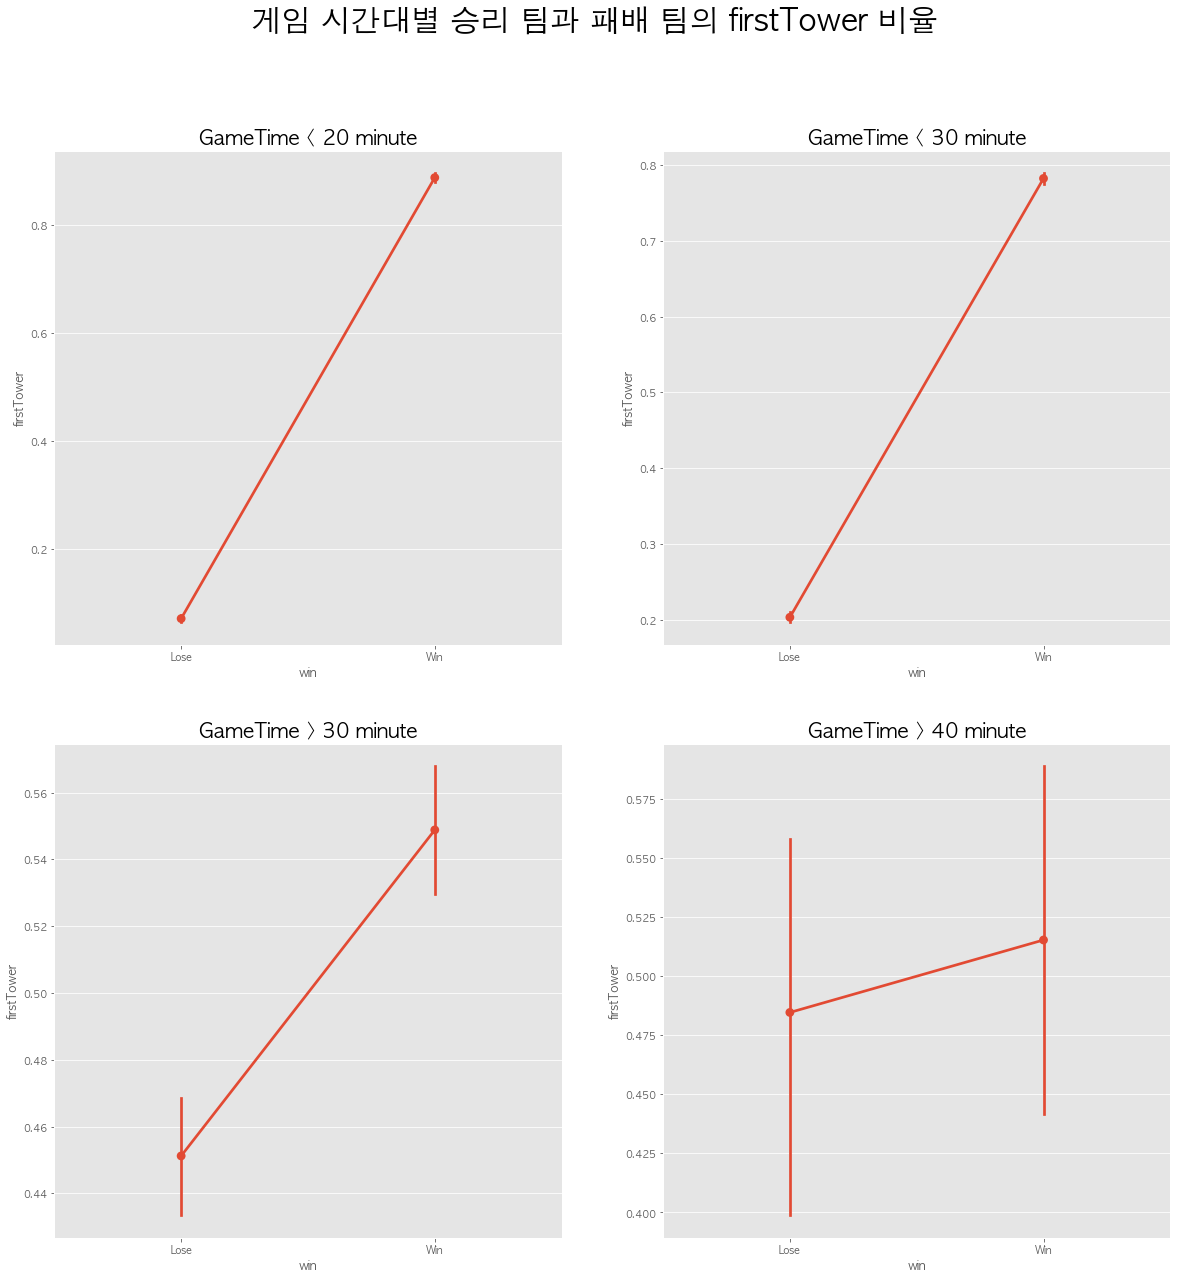

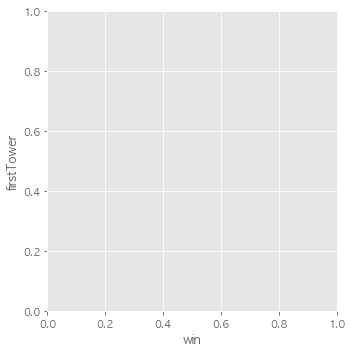

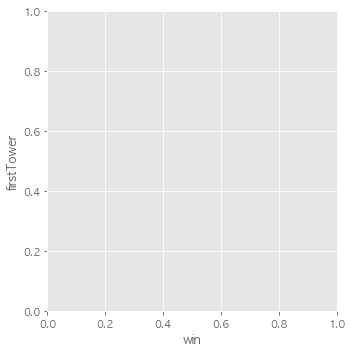

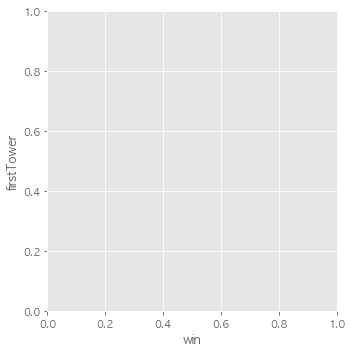

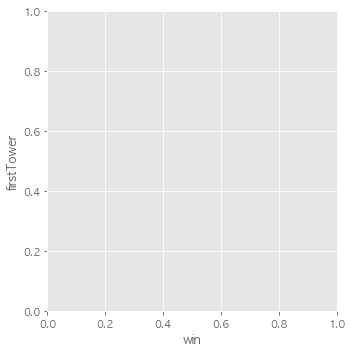

In [197]:
first_time_ratio('win','firstTower')
plt.show()

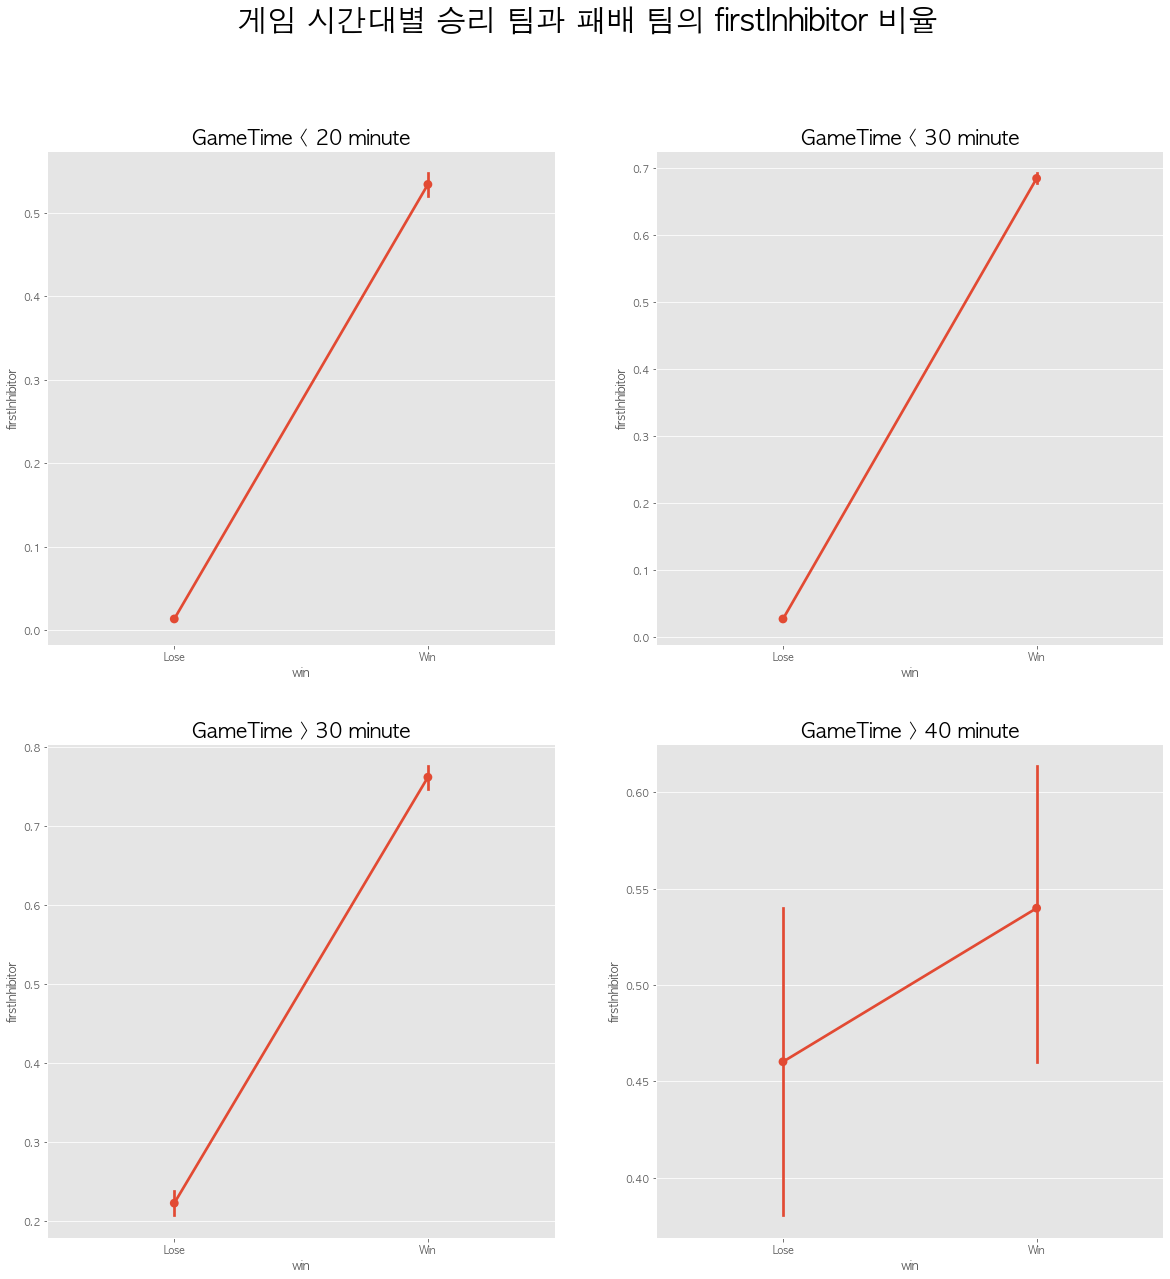

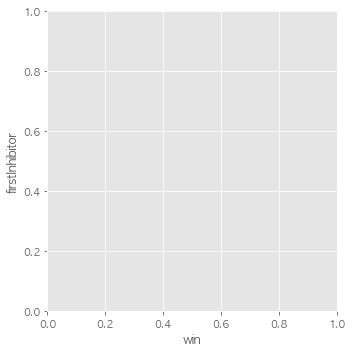

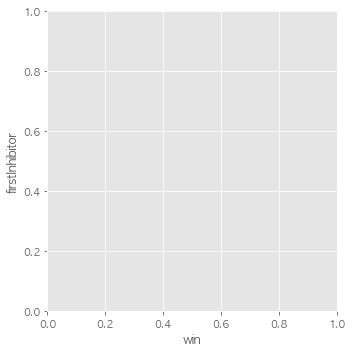

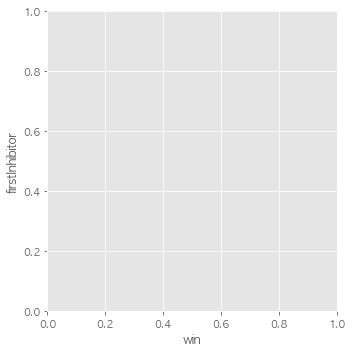

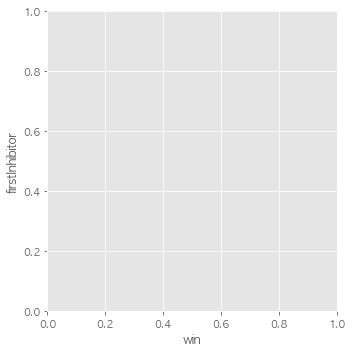

In [198]:
first_time_ratio('win','firstInhibitor')
plt.show()

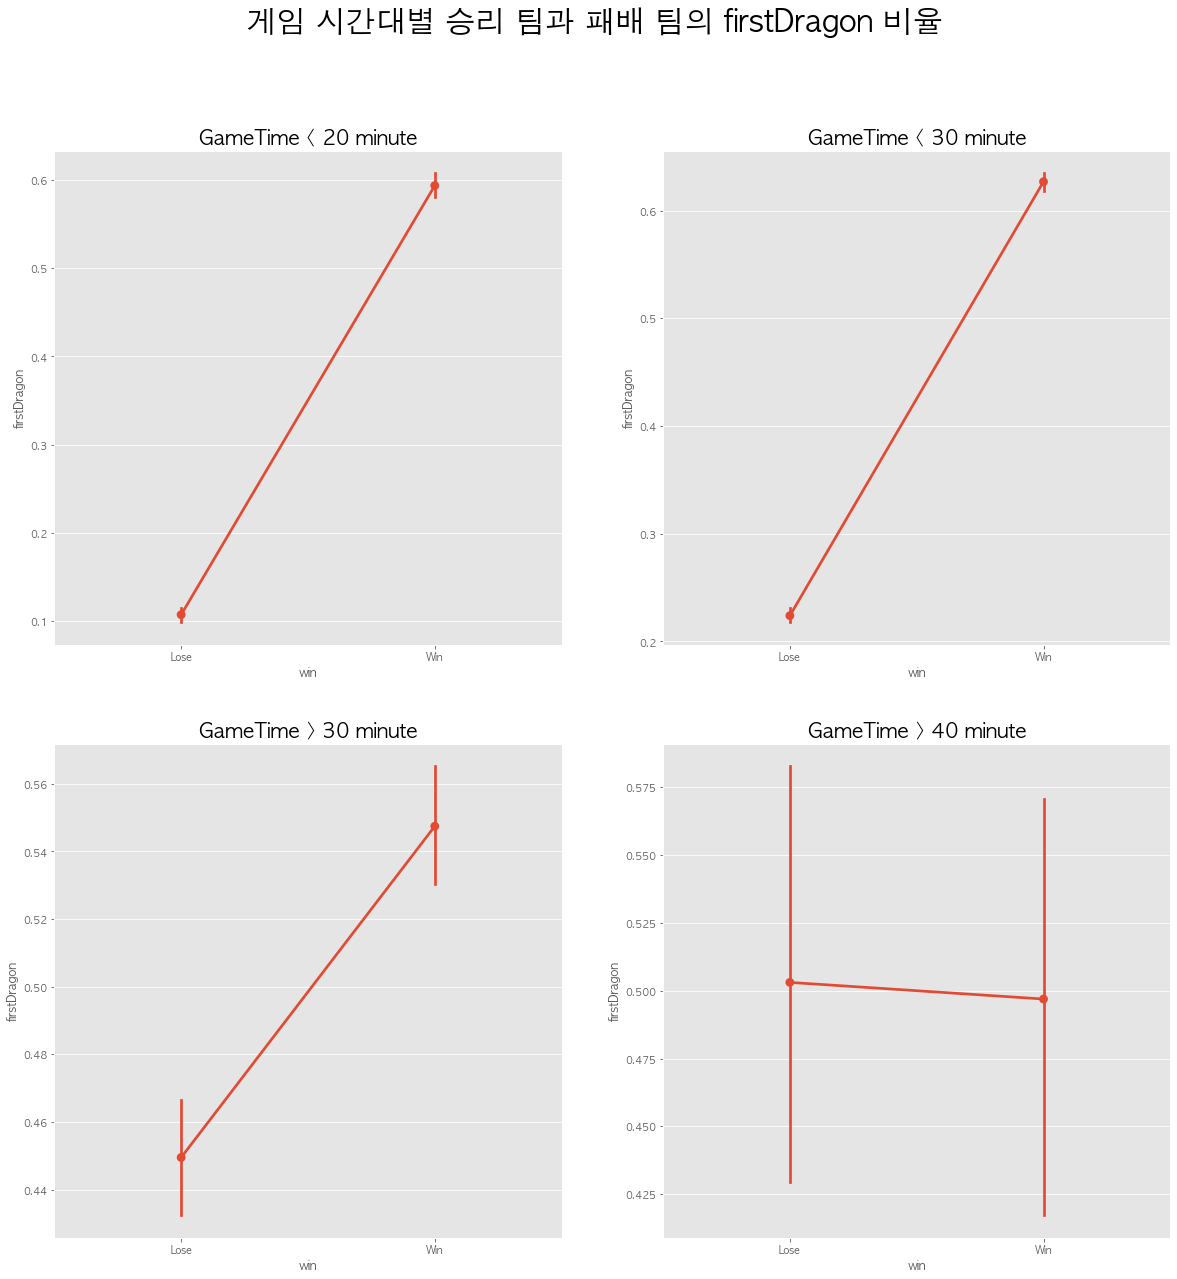

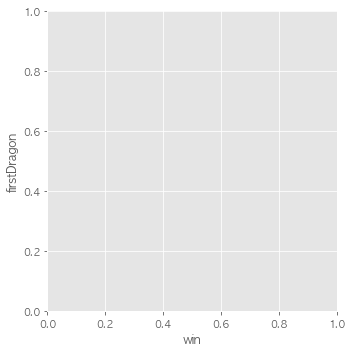

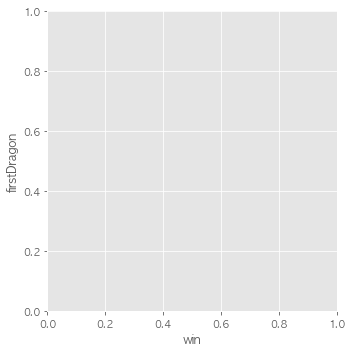

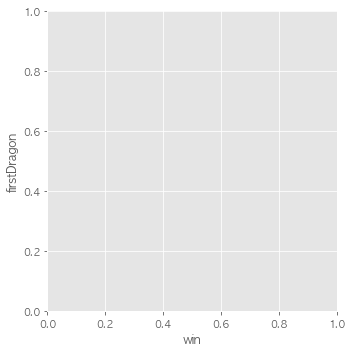

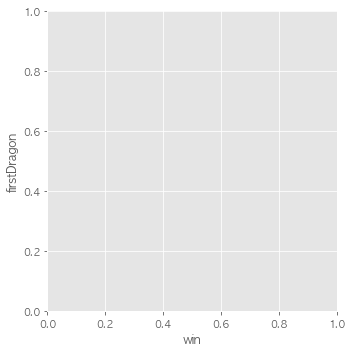

In [199]:
first_time_ratio('win','firstDragon')
plt.show()

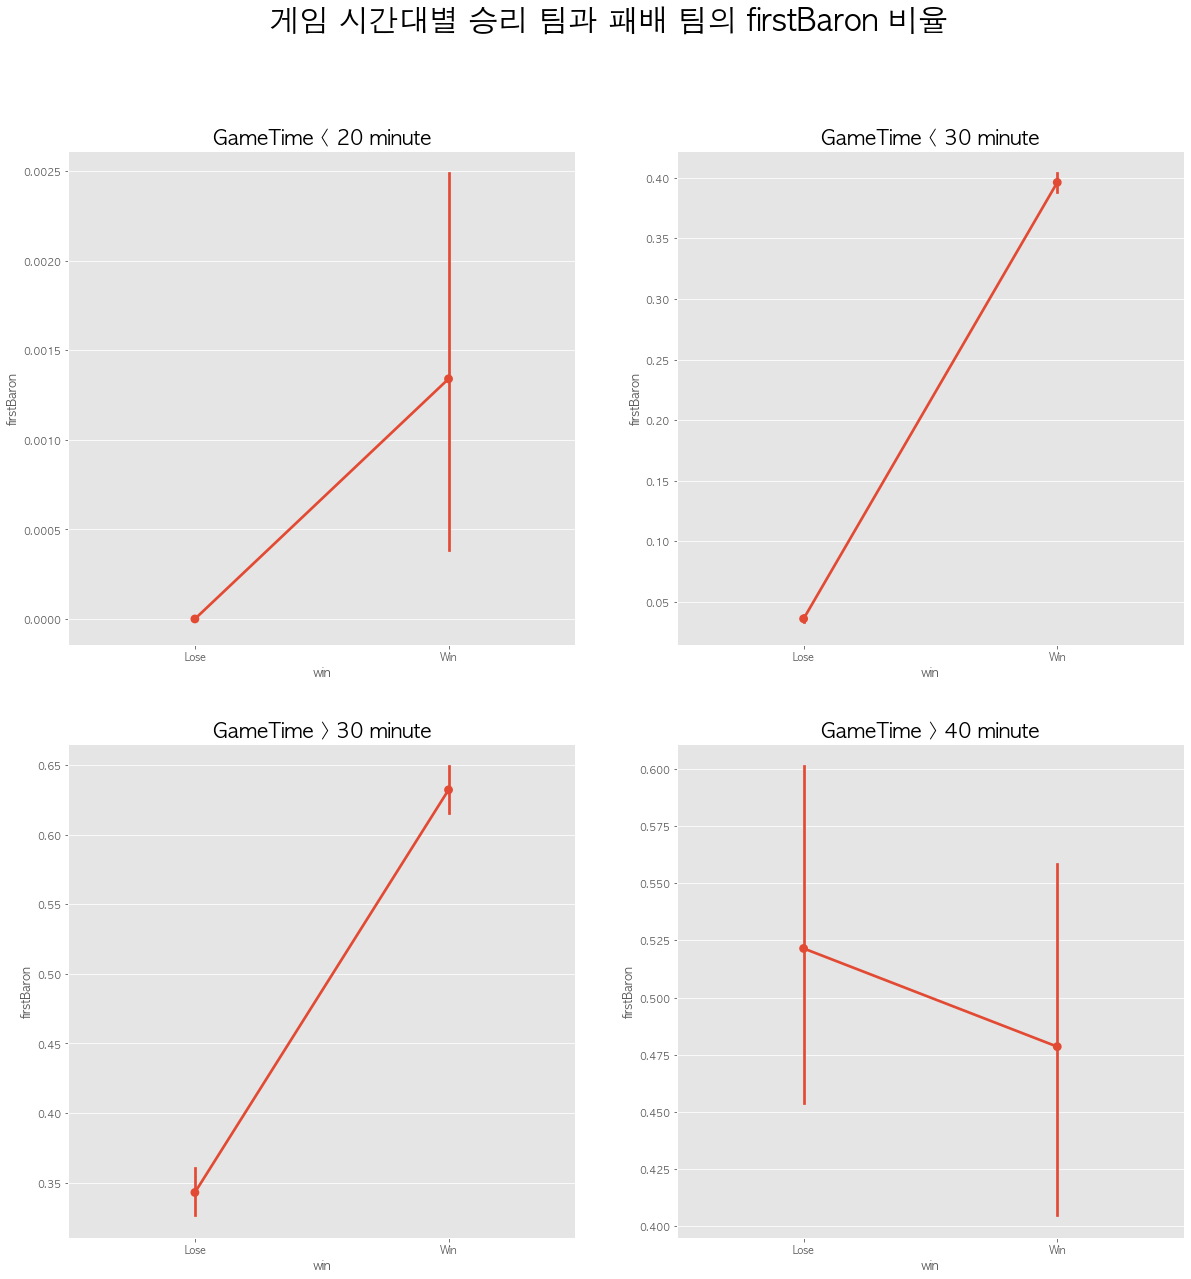

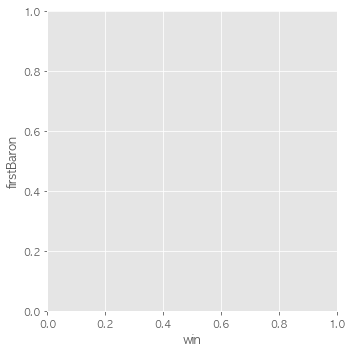

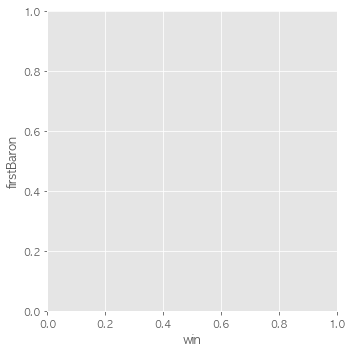

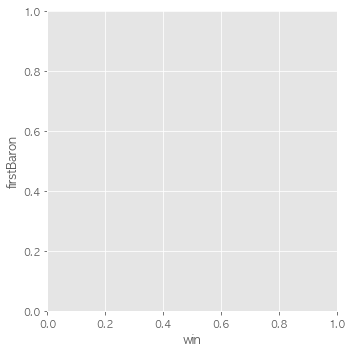

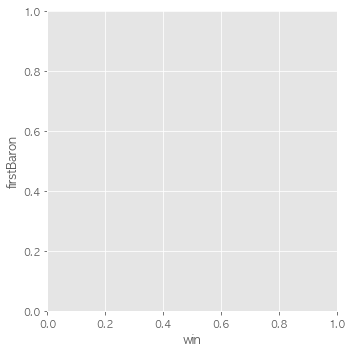

In [200]:
first_time_ratio('win','firstBaron')
plt.show()

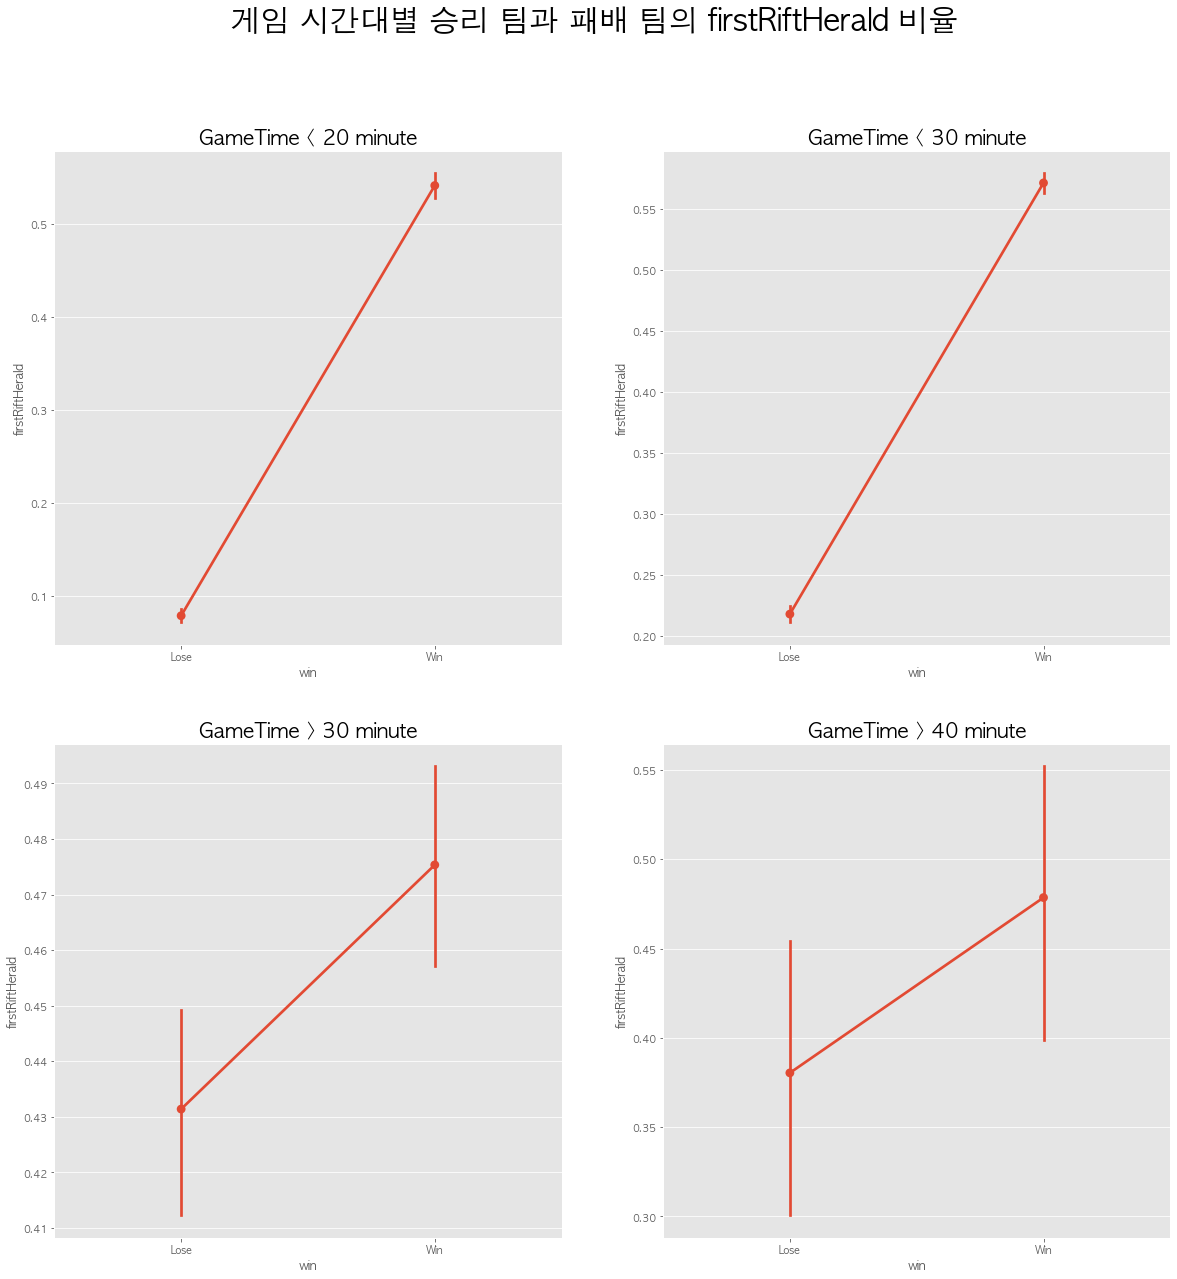

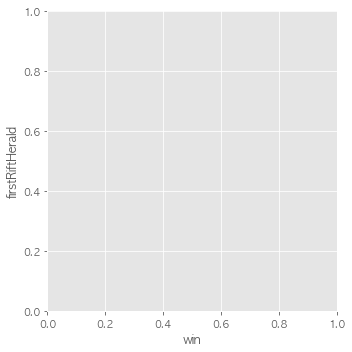

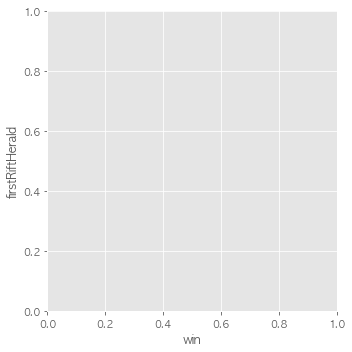

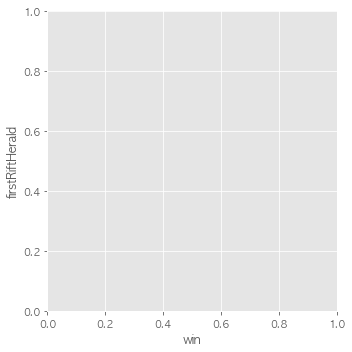

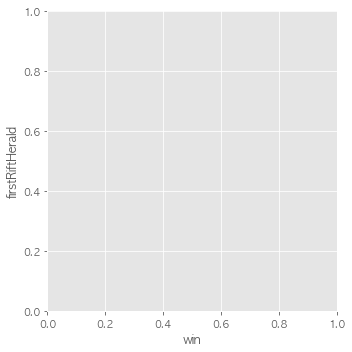

In [201]:
first_time_ratio('win','firstRiftHerald')
plt.show()

### 연속형 변수와의 상관관계

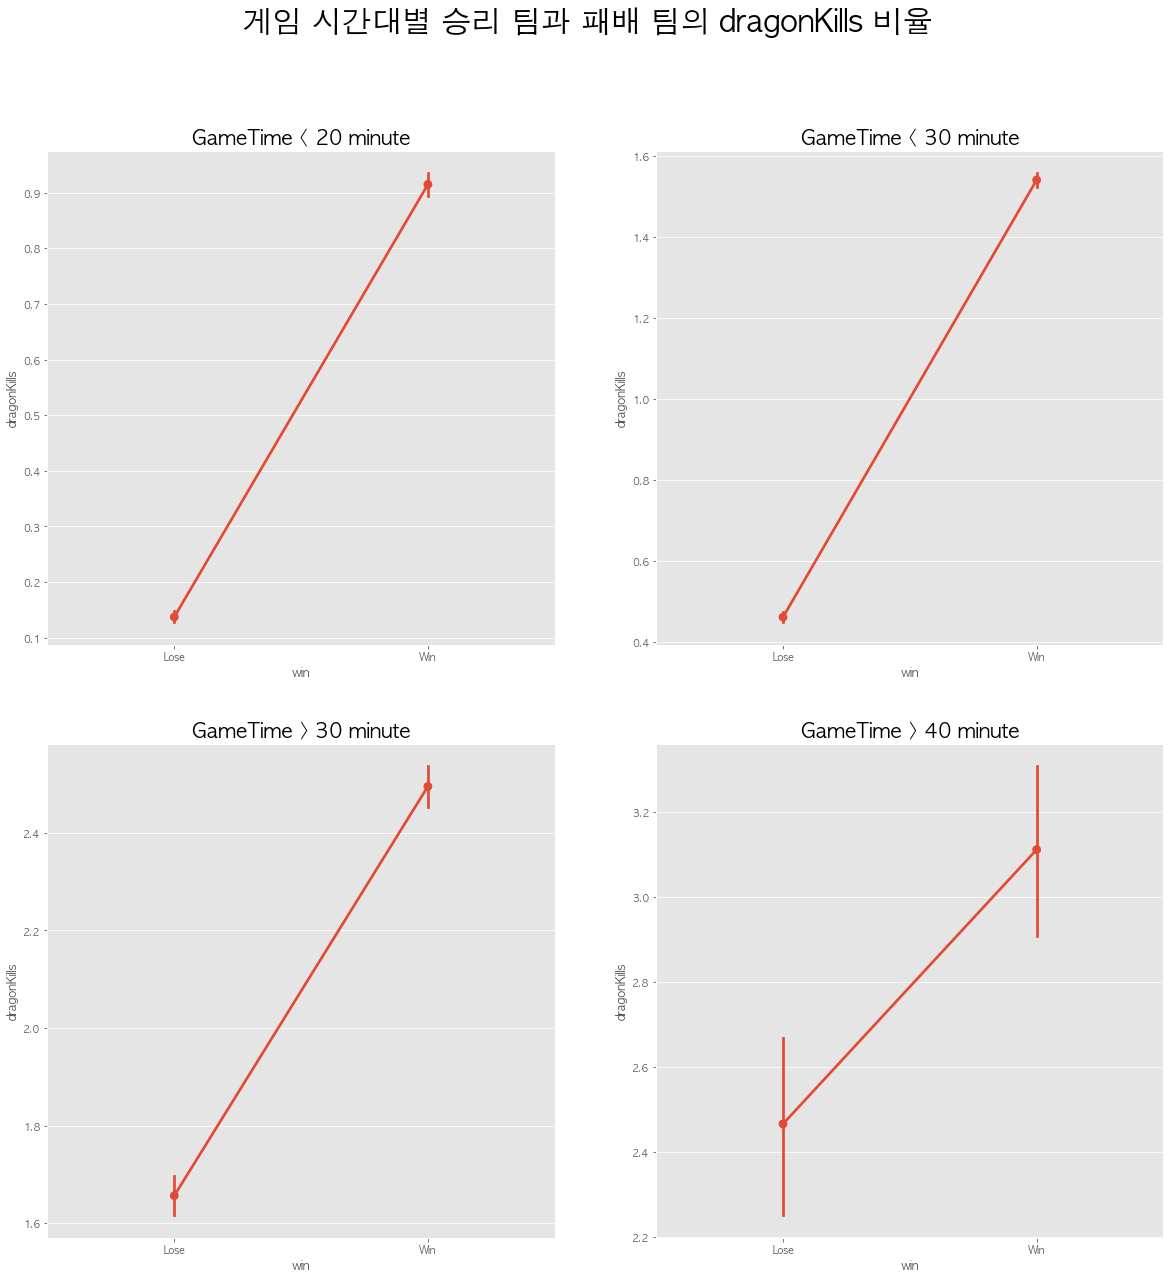

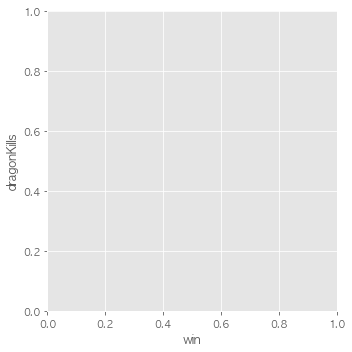

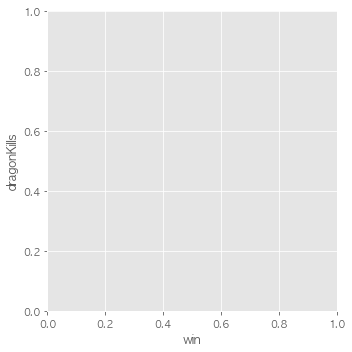

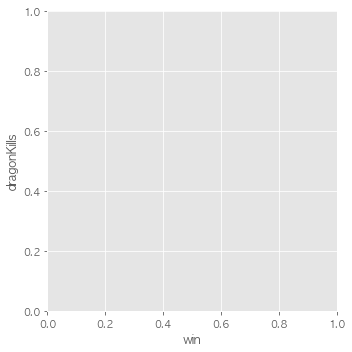

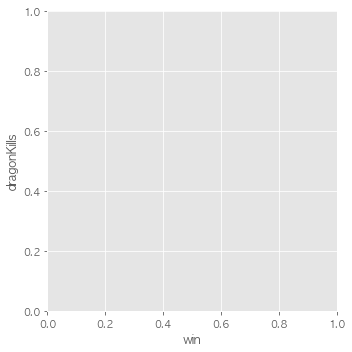

In [202]:
first_time_ratio('win','dragonKills')
plt.show()

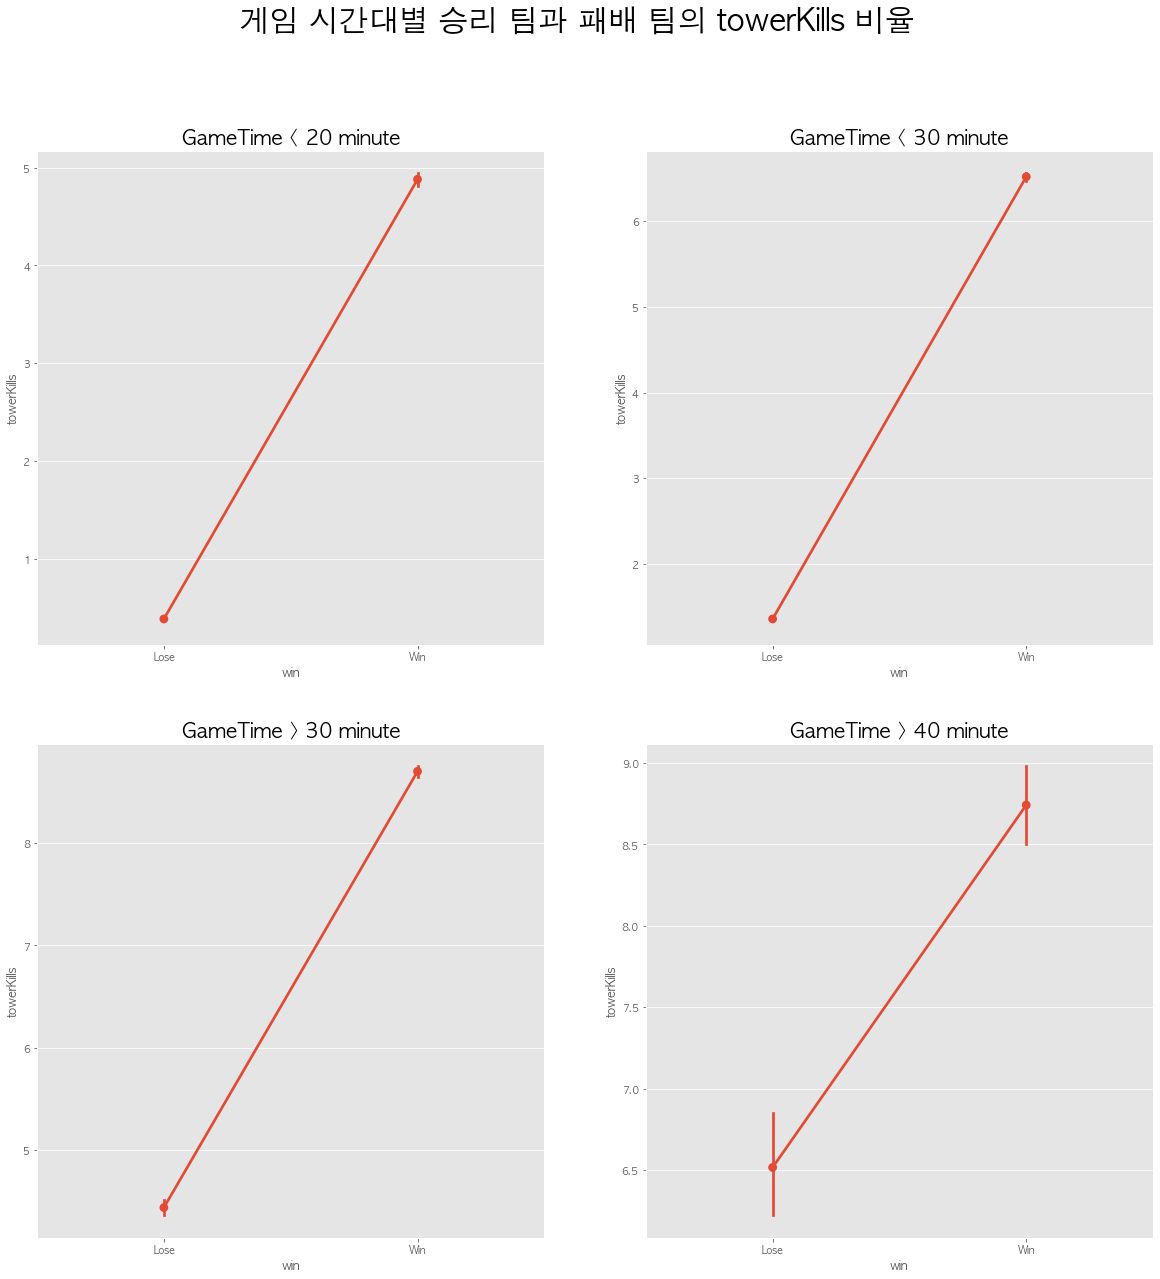

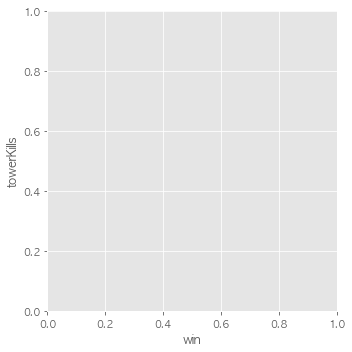

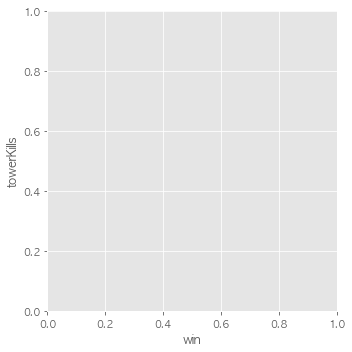

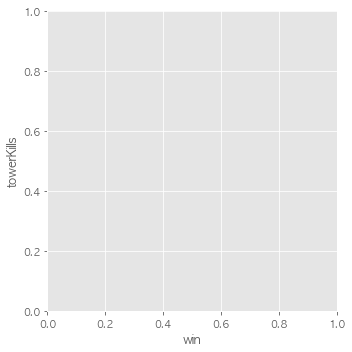

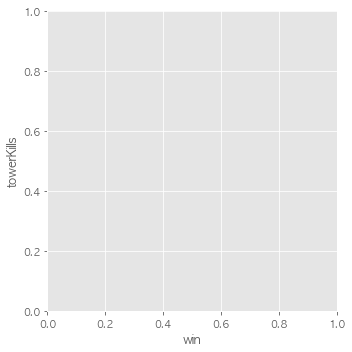

In [203]:
first_time_ratio('win','towerKills')
plt.show()

/Users/sinmin-yong/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


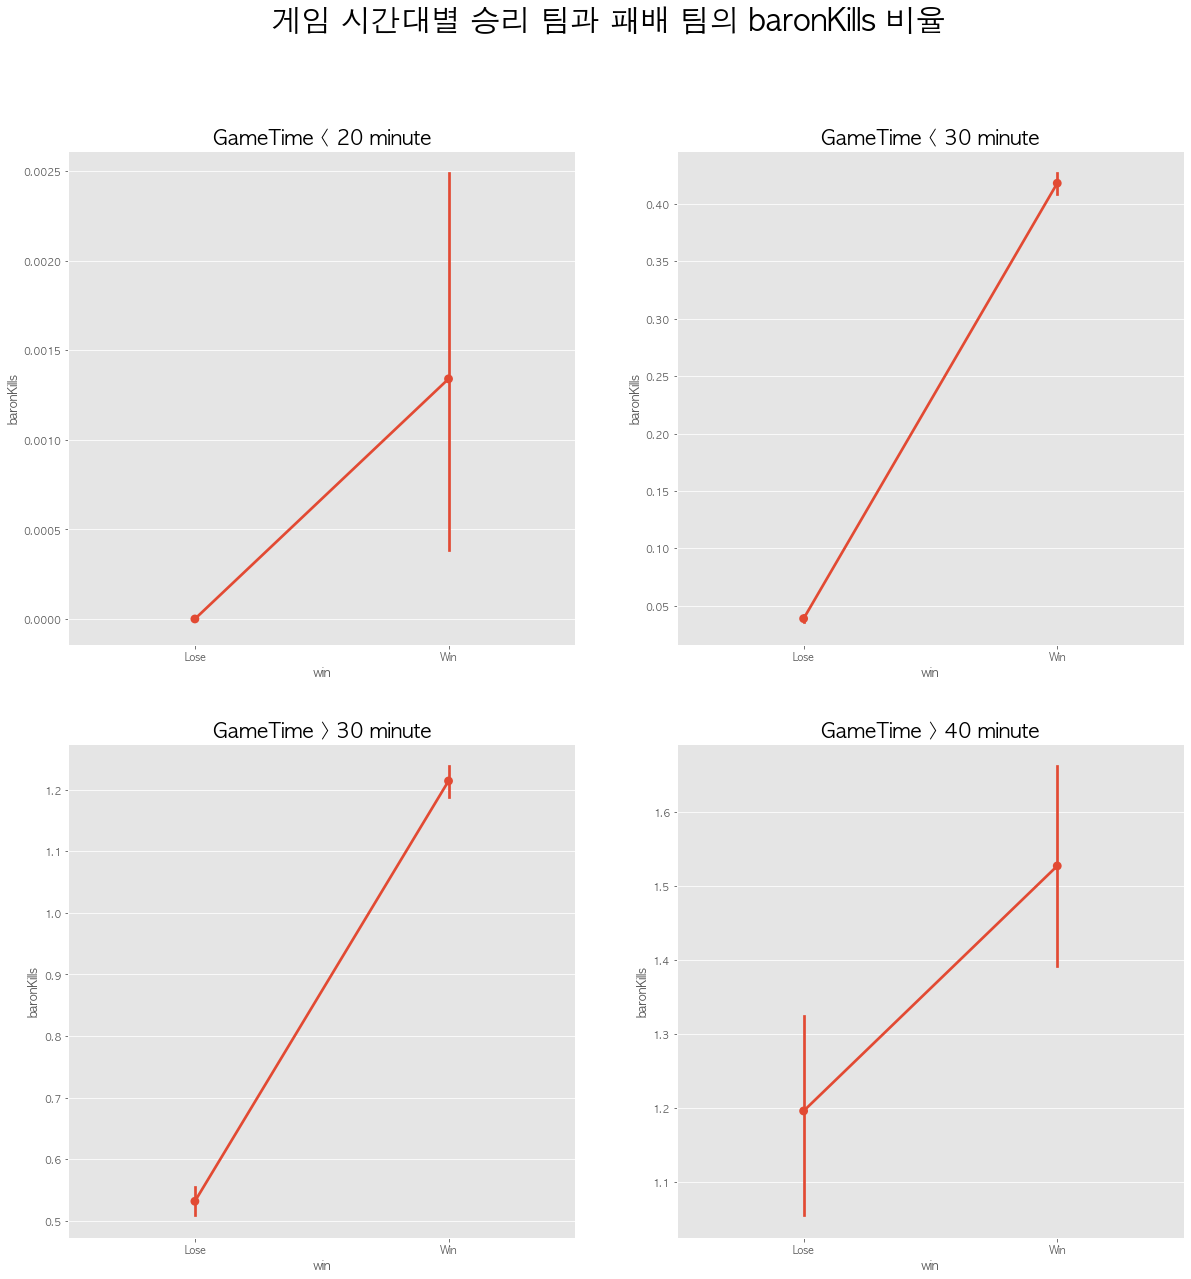

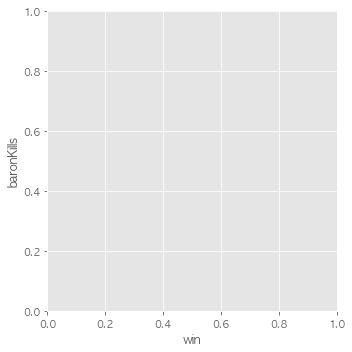

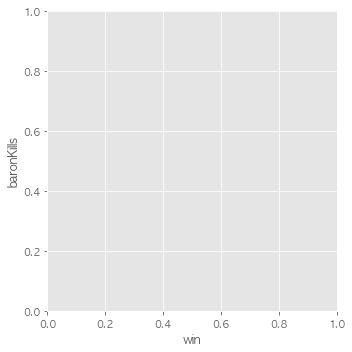

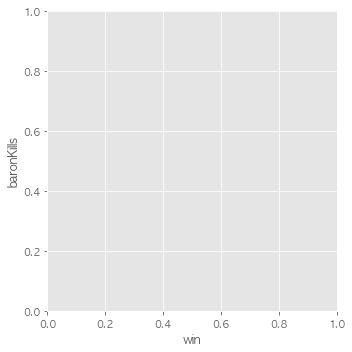

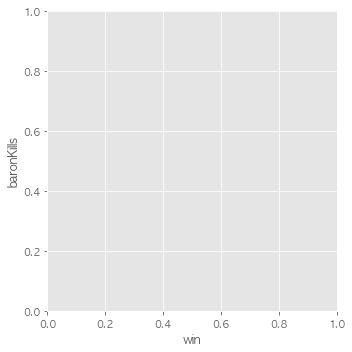

In [255]:
first_time_ratio('win','baronKills')
plt.show()

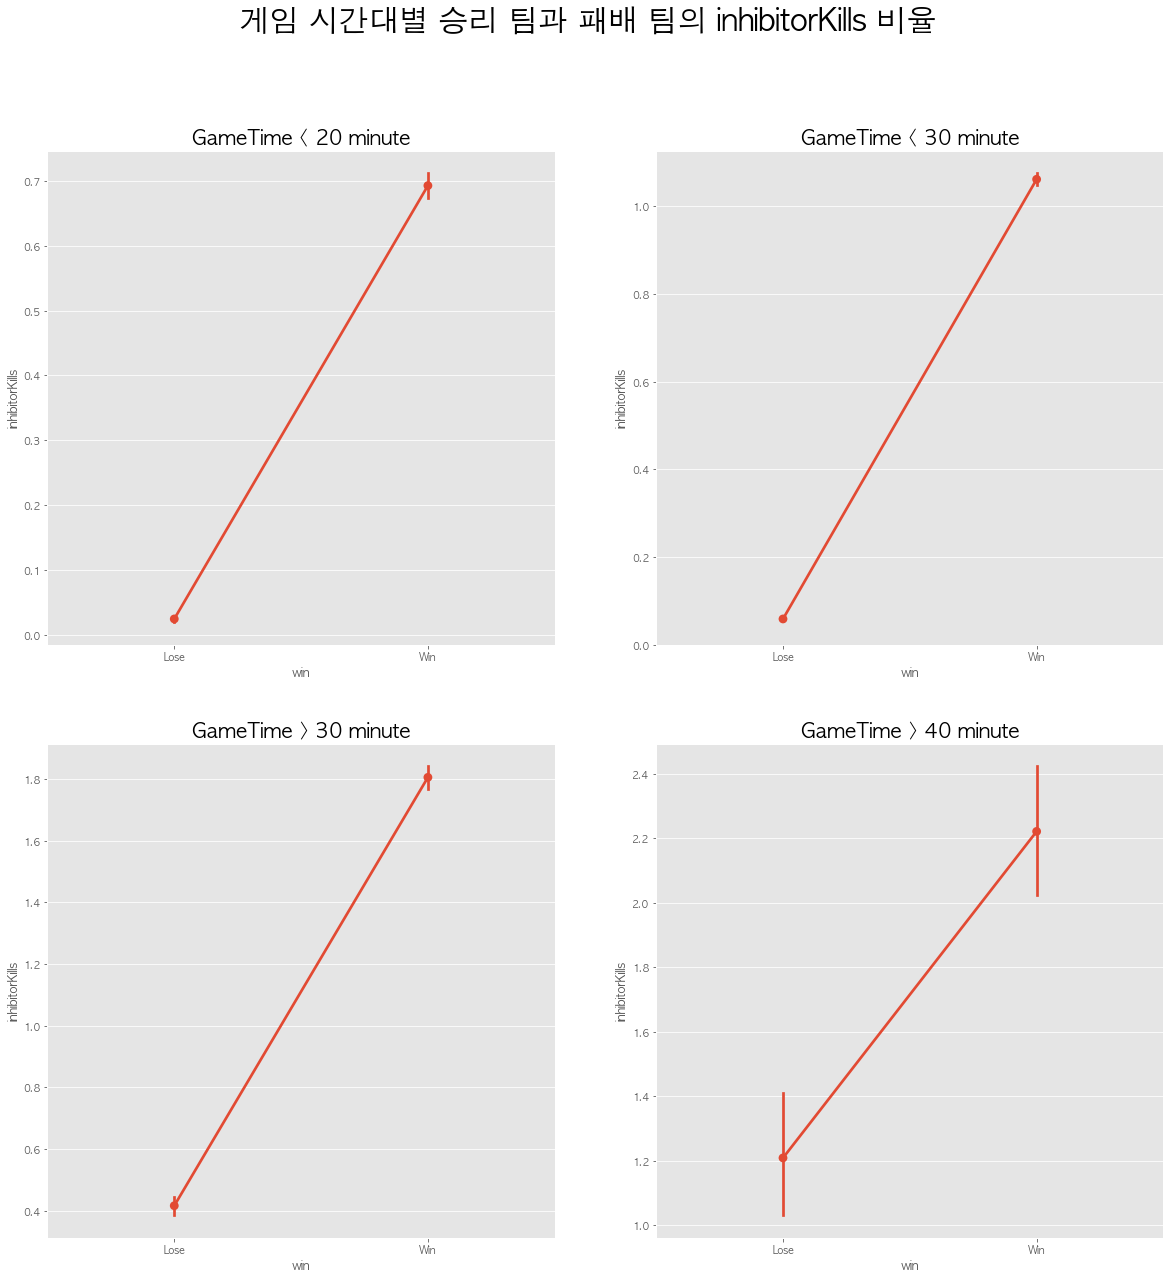

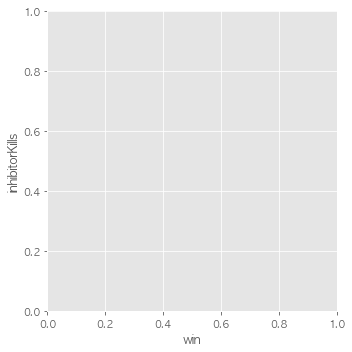

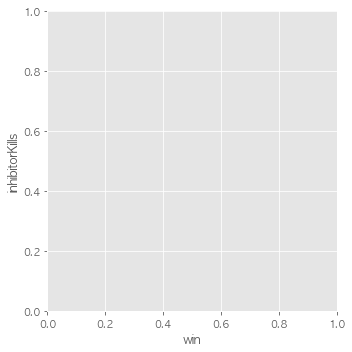

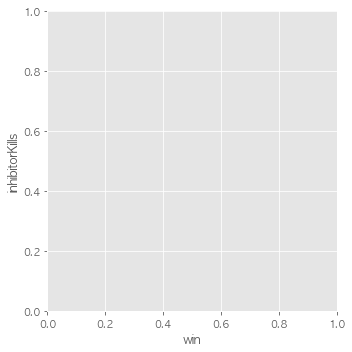

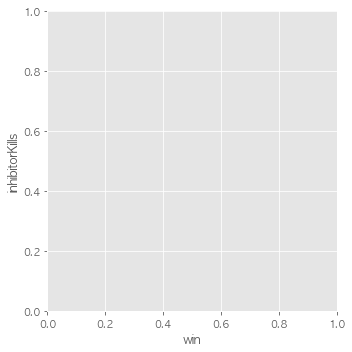

In [256]:
first_time_ratio('win','inhibitorKills')
plt.show()

### 어떤 챔피언이 밴율이 높았을까?

### 승리와 패배에 영향을 미치는 변수에 대한 Regression
    - 상관분석
    - 회귀분석
        - 선형회귀
        - 로지스틱

In [54]:
game_df['win_encoding'] = game_df['win'].map({'Win':1,'Lose':0})

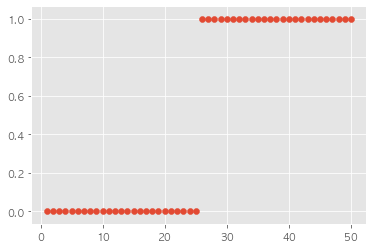

In [67]:
plt.scatter(list(range(1,51)),[0]*25 + [1]*25)

In [68]:
game_df.select_dtypes(['int64','float64']).corr()[['win_encoding']]

,win_encoding
teamId,0.007807
firstBlood,0.225384
firstTower,0.496819
firstInhibitor,0.656320
firstBaron,0.395675
firstDragon,0.353563
firstRiftHerald,0.306255
towerKills,0.728130
inhibitorKills,0.581161
baronKills,0.380262


In [11]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34968 entries, 0 to 0
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   teamId                34968 non-null  int64  
 1   win                   34967 non-null  object 
 2   firstBlood            34968 non-null  int64  
 3   firstTower            34968 non-null  int64  
 4   firstInhibitor        34968 non-null  int64  
 5   firstBaron            34968 non-null  int64  
 6   firstDragon           34968 non-null  int64  
 7   firstRiftHerald       34968 non-null  int64  
 8   towerKills            34968 non-null  int64  
 9   inhibitorKills        34968 non-null  int64  
 10  baronKills            34968 non-null  int64  
 11  dragonKills           34968 non-null  int64  
 12  vilemawKills          34968 non-null  int64  
 13  riftHeraldKills       34968 non-null  int64  
 14  dominionVictoryScore  34968 non-null  int64  
 15  bans                  3

In [14]:
reg_df = game_df.drop(columns=['teamId','vilemawKills','dominionVictoryScore','win','bans','game_time'])

In [15]:
reg_df = reg_df.dropna()

In [17]:
reg_df['win_encoding'] = reg_df['win_encoding'].astype('int64')

In [19]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34967 entries, 0 to 0
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   firstBlood       34967 non-null  int64
 1   firstTower       34967 non-null  int64
 2   firstInhibitor   34967 non-null  int64
 3   firstBaron       34967 non-null  int64
 4   firstDragon      34967 non-null  int64
 5   firstRiftHerald  34967 non-null  int64
 6   towerKills       34967 non-null  int64
 7   inhibitorKills   34967 non-null  int64
 8   baronKills       34967 non-null  int64
 9   dragonKills      34967 non-null  int64
 10  riftHeraldKills  34967 non-null  int64
 11  gameDuration     34967 non-null  int64
 12  win_encoding     34967 non-null  int64
dtypes: int64(13)
memory usage: 3.7 MB


In [31]:
reg_df[['win_encoding']]

,win_encoding
0,0
0,1
0,1
0,1
0,0
...,...
0,1
0,0
0,0
0,1


In [20]:
logit = sm.Logit(reg_df[['win_encoding']],reg_df[reg_df.columns.tolist()[:-2]]) #로지스틱 회귀분석 시행

In [21]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.508855
         Iterations 7


In [116]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                    Logit                Pseudo R-squared:     0.266     
Dependent Variable:       win_encoding         AIC:                  35606.2507
Date:                     2020-03-14 00:37     BIC:                  35690.8723
No. Observations:         34967                Log-Likelihood:       -17793.   
Df Model:                 9                    LL-Null:              -24237.   
Df Residuals:             34957                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           7.0000                                               
-------------------------------------------------------------------------------
                 Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
-------------------------------------------------------------------------------
firstBlood      -0.8452       0.0261 -32.4217 0.0000       -0.8962      -0.7941
firstTower       0.5160       0.0324  15.9159 0.0000        0.4525       0.5796
firstInhibitor   1.7249       0.0591  29.1665 0.0000        1.6090       1.8408
firstBaron       0.5470       0.0715   7.6473 0.0000        0.4068       0.6872
firstDragon      0.2771       0.0370   7.4819 0.0000        0.2045       0.3496
firstRiftHerald -0.1864 1432560.0887  -0.0000 1.0000 -2807766.3659 2807765.9932
towerKills       0.0862       0.0091   9.4693 0.0000        0.0683       0.1040
inhibitorKills   0.4416       0.0390  11.3129 0.0000        0.3651       0.5181
baronKills      -0.1737       0.0588  -2.9543 0.0031       -0.2890      -0.0585
dragonKills     -0.2631       0.0200 -13.1488 0.0000       -0.3023      -0.2239
riftHeraldKills -0.1864 1432560.0887  -0.0000 1.0000 -2807766.3659 2807765.9932
===============================================================================

"""

### 계수 해석

    - 연속형 변수인 경우 한 단위 증가했을 때 exp(coef) 배 증가
    - 범주형 데이터의 경우 해석할 떄 유의
        - 회귀계수로 나온 것이 1일 때의 계수값이 나왔으므로 0을 기준으로 해석을 진행
        - ex) 퍼블을 먹을수록 먹지않았을 때보다 승리확률이 0.43배 증가한다.

In [265]:
for i in range(len(result.params)):
    print('다른 변수가 고정되어 있으며, {} 이 한단위 상승할 때 승리할 확률이 {} 배 증가한다.\n'.format(result.params.keys()[i],np.exp(result.params.values[i])))

다른 변수가 고정되어 있으며, firstBlood 이 한단위 상승할 때 승리할 확률이 0.42949220979699154 배 증가한다.

다른 변수가 고정되어 있으며, firstTower 이 한단위 상승할 때 승리할 확률이 1.6753860961482996 배 증가한다.

다른 변수가 고정되어 있으며, firstInhibitor 이 한단위 상승할 때 승리할 확률이 5.611940497461367 배 증가한다.

다른 변수가 고정되어 있으며, firstBaron 이 한단위 상승할 때 승리할 확률이 1.7280090865986866 배 증가한다.

다른 변수가 고정되어 있으며, firstDragon 이 한단위 상승할 때 승리할 확률이 1.3192370021466866 배 증가한다.

다른 변수가 고정되어 있으며, firstRiftHerald 이 한단위 상승할 때 승리할 확률이 0.829978172548431 배 증가한다.

다른 변수가 고정되어 있으며, towerKills 이 한단위 상승할 때 승리할 확률이 1.089980126972281 배 증가한다.

다른 변수가 고정되어 있으며, inhibitorKills 이 한단위 상승할 때 승리할 확률이 1.5551247659212932 배 증가한다.

다른 변수가 고정되어 있으며, baronKills 이 한단위 상승할 때 승리할 확률이 0.8405268196269144 배 증가한다.

다른 변수가 고정되어 있으며, dragonKills 이 한단위 상승할 때 승리할 확률이 0.7686574349863156 배 증가한다.

다른 변수가 고정되어 있으며, riftHeraldKills 이 한단위 상승할 때 승리할 확률이 0.8299782259019824 배 증가한다.



In [277]:
np.exp(result.params)

firstBlood         0.429492
firstTower         1.675386
firstInhibitor     5.611940
firstBaron         1.728009
firstDragon        1.319237
firstRiftHerald    0.829978
towerKills         1.089980
inhibitorKills     1.555125
baronKills         0.840527
dragonKills        0.768657
riftHeraldKills    0.829978
dtype: float64

In [278]:
#1/_ 가 어떤 함수지??
1/_

firstBlood         2.328331
firstTower         0.596877
firstInhibitor     0.178191
firstBaron         0.578701
firstDragon        0.758014
firstRiftHerald    1.204851
towerKills         0.917448
inhibitorKills     0.643035
baronKills         1.189730
dragonKills        1.300970
riftHeraldKills    1.204851
dtype: float64

# 단일 변수 모델

In [74]:
reg_df2 = reg_df[reg_df.columns.tolist()[:-2] + ['win_encoding']]

In [76]:
explain_var = reg_df2.columns.tolist()[:-1]

In [78]:
logit = sm.Logit(reg_df2[['win_encoding']],reg_df[[explain_var[0]]]) #로지스틱 회귀분석 시행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.680307
         Iterations 4


In [82]:
result.params.values[0]

0.459695985933835

In [86]:
result.pvalues.values[0]

3.1081064248742172e-192

In [88]:
reg_df2 = reg_df[reg_df.columns.tolist()[:-2] + ['win_encoding']]
explain_var = reg_df2.columns.tolist()[:-1]

coef_ls = []
pvalue_ls = []
exp_ls = []
var_ls = []
simple_model = pd.DataFrame()

for i in explain_var:
    logit = sm.Logit(reg_df2[['win_encoding']],reg_df[[i]]) #로지스틱 회귀분석 시행
    result = logit.fit()
    
    coef_ls.append(result.params.values[0])
    pvalue_ls.append(result.pvalues.values[0])
    exp_ls.append(str(round(np.exp(result.params.values[0]),3)) + '배 증가')
    var_ls.append(i)

simple_model['variance'] = var_ls
simple_model['coefficient'] = coef_ls
simple_model['solution'] = exp_ls
simple_model['p_value'] = pvalue_ls



Optimization terminated successfully.
         Current function value: 0.680307
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.627744
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.536023
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.630175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656999
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582917
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547654
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.633256
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.641779
  

In [89]:
simple_model

,variance,coefficient,solution,p_value
0,firstBlood,0.459696,1.584배 증가,3.108106e-192
1,firstTower,1.106347,3.023배 증가,0.000000e+00
2,firstInhibitor,2.443537,11.514배 증가,0.000000e+00
3,firstBaron,1.597842,4.942배 증가,0.000000e+00
4,firstDragon,0.848854,2.337배 증가,0.000000e+00
5,firstRiftHerald,0.780815,2.183배 증가,0.000000e+00
6,towerKills,0.194593,1.215배 증가,0.000000e+00
7,inhibitorKills,1.477358,4.381배 증가,0.000000e+00
8,baronKills,1.257966,3.518배 증가,0.000000e+00
9,dragonKills,0.418383,1.52배 증가,0.000000e+00


# Participants 데이터 파악
    - 오브젝트 데이터 이외에 다른 데이터 파악
    - 각 경기 내부 데이터를 알 수 있음

### 각 컬럼 설명
    - participantId : 게임 내부 소환사 id (1-10)
    - teamId : 각 팀 id
    - championId : 어떤 챔피언은 pick했는지
    - spell(1,2)Id : 어떤 스펠을 들었는지
    - highestAchievedSeasonTier : 최상위로 올라갔던 티어
    - stat : 통계
        - win : T(승리) / F(패배)
        - item(0~6) : 어떤 아이템을 들었는지
        - kills : 얼마나 죽였는지
        - deaths : 얼마나 죽었는지
        - assists : 킬에 얼마나 관여했는지
            - (kda컬럼 만들 수 있음)
        - largestKillingSpree : ??
        - largestMultiKill : 멀티킬 횟수?
        - killingSprees : ??
        - longestTimeSpentLiving : ??
        - doubleKills(triple ~ unrealkill) : 킬로그 횟수
        - totalDamageDealt : 총 피해량
        - magicDamageDealt : 가한 총 마법 피해량
        - physicalDamageDealt : 가한 총 물리 피해량
        - trueDamageDealt : ??
        - largestCriticalStrike : 치명타?
        - totalDamageDealtToChampions : 챔피언에게 가한 총 피해량
        - magicDamageDealtToChampions : 챔피언에게 가한 마법 피해량
        - physicalDamageDealtToChampions : 챔피언에게 가한 물리 피해량
        - trueDamageDealtToChampions : ??
        - totalHeal : 총 회복량
        - totalUnitsHealed : ??
        - damageSelfMitigated : ??
        - damageDealtToObjectives : 오브젝트에 입힌 피해량
        - damageDealtToTurrets : 포탑에 가한 피해량
        - visionScore : ??
        - timeCCingOthers : ??
        - totalDamageTaken : 받은 총 피해량
        - magicalDamageTaken : 받은 마법 피해량
        - physicalDamageTaken : 받은 물리 피해량
        - trueDamageTaken : ??
        - goldEarned : 획득한 골드량
        - goldSpent : 사용한 골드량
        - turretKills : 포탑 킬
        - inhibitorKills : 억제기 킬
        - totalMinionsKilled : 
        - neutralMinionsKilled : ??
        - neutralMinionsKilledTeamJungle : ??
        - neutralMinionsKilledEnemyJungle : ??
        - totalTimeCrowdControlDealt : ??
        - champLevel : 챔피언 레벨
        - visionWardsBoughtInGame : ??
        - sightWardsBoughtInGame : ??
        - wardsPlaced : ??
        - wardsKilled : ??
        - firstBloodKill : 퍼블을 했는지 여부
        - firstBloodAssist : 퍼블 어시를 했는지 여부
        - firstTowerKill : 첫 타워 부신 여부
        - firstTowerAssist : 첫 타워 부신 어시스트 여부
        - firstInhibitorKill : 첫 억제기 여부
        - firstInhibitorAssist : 첫 억제기 어시 여부
        - combatPlayerScore : ??
        - objectivePlayerScore : ??
        - totalPlayerScore : ??
        - totalScoreRank : ??
        - playerScore(0~9) : ??
        - perk(1~5) : ??
        - perk(1~5)Var(1~3) : ??
        - perkPrimaryStyle : ??
        - perkSubStyle : ??
        - statperk(0~2) : ??
    - role : 팀 역할
    - lane : 위치

In [12]:
lol_df['participants'].iloc[0][0]

{'participantId': 1,
 'teamId': 100,
 'championId': 24,
 'spell1Id': 12,
 'spell2Id': 4,
 'highestAchievedSeasonTier': 'DIAMOND',
 'stats': {'participantId': 1,
  'win': False,
  'item0': 2033,
  'item1': 3078,
  'item2': 3067,
  'item3': 2422,
  'item4': 1038,
  'item5': 1036,
  'item6': 3340,
  'kills': 3,
  'deaths': 5,
  'assists': 3,
  'largestKillingSpree': 0,
  'largestMultiKill': 1,
  'killingSprees': 0,
  'longestTimeSpentLiving': 308,
  'doubleKills': 0,
  'tripleKills': 0,
  'quadraKills': 0,
  'pentaKills': 0,
  'unrealKills': 0,
  'totalDamageDealt': 83044,
  'magicDamageDealt': 20075,
  'physicalDamageDealt': 59274,
  'trueDamageDealt': 3695,
  'largestCriticalStrike': 0,
  'totalDamageDealtToChampions': 13153,
  'magicDamageDealtToChampions': 4344,
  'physicalDamageDealtToChampions': 8809,
  'trueDamageDealtToChampions': 0,
  'totalHeal': 2685,
  'totalUnitsHealed': 1,
  'damageSelfMitigated': 14153,
  'damageDealtToObjectives': 4195,
  'damageDealtToTurrets': 3665,
  'v

In [47]:
lol_df['participants'].iloc[0][8]

{'participantId': 9,
 'teamId': 200,
 'championId': 45,
 'spell1Id': 4,
 'spell2Id': 12,
 'highestAchievedSeasonTier': 'SILVER',
 'stats': {'participantId': 9,
  'win': True,
  'item0': 3285,
  'item1': 3152,
  'item2': 0,
  'item3': 1056,
  'item4': 0,
  'item5': 3020,
  'item6': 3340,
  'kills': 2,
  'deaths': 3,
  'assists': 12,
  'largestKillingSpree': 2,
  'largestMultiKill': 1,
  'killingSprees': 1,
  'longestTimeSpentLiving': 504,
  'doubleKills': 0,
  'tripleKills': 0,
  'quadraKills': 0,
  'pentaKills': 0,
  'unrealKills': 0,
  'totalDamageDealt': 79687,
  'magicDamageDealt': 71429,
  'physicalDamageDealt': 8257,
  'trueDamageDealt': 0,
  'largestCriticalStrike': 0,
  'totalDamageDealtToChampions': 14214,
  'magicDamageDealtToChampions': 13543,
  'physicalDamageDealtToChampions': 670,
  'trueDamageDealtToChampions': 0,
  'totalHeal': 846,
  'totalUnitsHealed': 1,
  'damageSelfMitigated': 3623,
  'damageDealtToObjectives': 5443,
  'damageDealtToTurrets': 2964,
  'visionScore': 